In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [32]:
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [33]:
df['Sleep_Hours'].unique()

array([ 7,  8,  6, 10,  9,  5,  4])

In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [35]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [36]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)

/tmp/ipython-input-1431040973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)


In [37]:
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)

/tmp/ipython-input-3580517999.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)


In [38]:
teacher_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Teacher_Quality'] = df['Teacher_Quality'].map(teacher_mapping)

In [39]:
school_mapping = {'Private': 1, 'Public': 0}
df['School_Type'] = df['School_Type'].map(school_mapping)

In [40]:
edu_mapping = {'High School': 1, 'College': 2, 'Postgraduate': 3}
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(edu_mapping)

In [41]:
X = df[[
    "Hours_Studied",
    "Attendance",
    "Previous_Scores",
    "Tutoring_Sessions",
    "Sleep_Hours",
    "Teacher_Quality",
    "School_Type",
    "Parental_Education_Level"
]]

y = df["Exam_Score"]


In [42]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [43]:
print("Enter Student Details:")

hours = float(input("Hours Studied (0-24): "))
attendance = float(input("Attendance (%) (0-100): "))
previous = float(input("Previous Score (0-100): "))
tutoring = float(input("Tutoring Sessions (0-10): "))
sleep = float(input("Sleep Hours (0-12): "))
teacher = input("Teacher Quality (Low/Medium/High): ")
school = input("School Type (Private/Public): ")
edu = input("Parental Education Level (High School/College/Postgraduate): ")

# Map text input to numbers
teacher_num = teacher_mapping[teacher]
school_num = school_mapping[school]
edu_num = edu_mapping[edu]

new_student = [[hours, attendance, previous, tutoring, sleep, teacher_num, school_num, edu_num]]

predicted_score = model.predict(new_student)[0]
print("\nPredicted Exam Score:", round(predicted_score,2))


Enter Student Details:
Hours Studied (0-24): 23
Attendance (%) (0-100): 84
Previous Score (0-100): 73
Tutoring Sessions (0-10): 0
Sleep Hours (0-12): 7
Teacher Quality (Low/Medium/High): Medium
School Type (Private/Public): Public
Parental Education Level (High School/College/Postgraduate): High School

Predicted Exam Score: 67.65


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
result = "Pass" if predicted_score >= 40 else "Fail"
print("Result:", result)


Result: Pass


In [45]:
if predicted_score >= 90:
    grade = "A"
elif predicted_score >= 80:
    grade = "B"
elif predicted_score >= 70:
    grade = "C"
elif predicted_score >= 60:
    grade = "D"
else:
    grade = "F"

print("Grade:", grade)


Grade: D


In [46]:
risk = "Yes" if predicted_score < 50 or attendance < 60 or previous < 50 else "No"
print("At Risk:", risk)


At Risk: No


In [47]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("\n===== Linear Regression Evaluation =====")

# R2 Score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", round(r2, 3))

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", round(mse, 3))

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", round(rmse, 3))



===== Linear Regression Evaluation =====
R2 Score: 0.658
Mean Squared Error (MSE): 4.839
Root Mean Squared Error (RMSE): 2.2


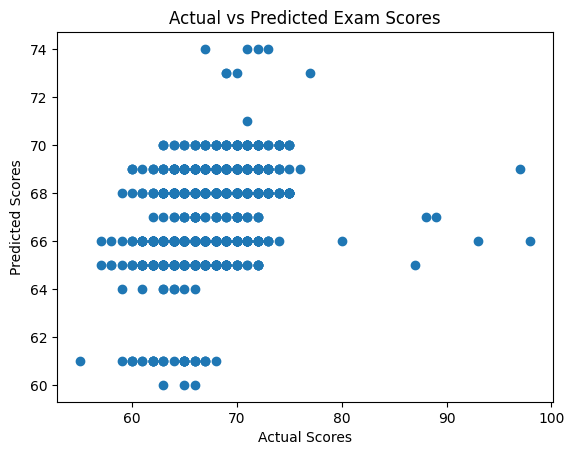

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()
